In [2]:
import tensorflow as tf
print(tf.__version__) 

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2025-03-25 14:23:35.481096: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.19.0
Notebook last run (end-to-end): 2025-03-25 14:23:38.486068


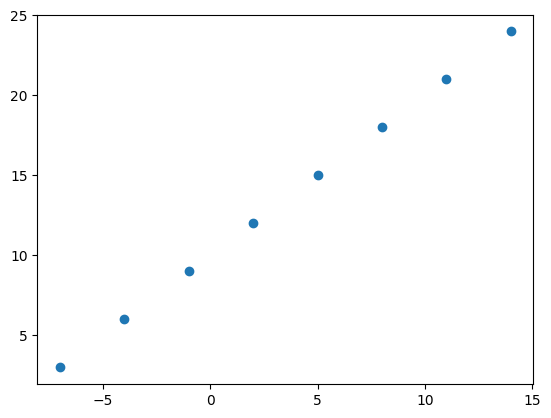

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize data
plt.scatter(X,y)

In [4]:
# X+10
# y == X+10

In [5]:
#Input and output shapes, create demo tensor for housing price prediction
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [7]:
X[0].ndim
X[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [8]:
##To jakieś dziwne zakomentuje i od razu zrobię tf.constant
#turn numpy to tensor
# X=tf.cast(tf.constant(X),dtype=tf.float32)
# y=tf.cast(tf.constant(y),dtype=tf.float32)
# X,y

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

Modelowanie w tensorflow + ulepszanie


In [10]:
#set random seed
tf.random.set_seed(42)

#Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#Fit model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step - loss: 13.6523 - mae: 13.6523
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 13.5115 - mae: 13.5115
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.3720 - mae: 13.3720
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.3007 - mae: 13.3007
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.1414 - mae: 13.1414
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.0020 - mae: 13.0020
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.8881 - mae: 12.8881
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.7745 - mae: 12.7745
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.6605 - mae: 12.6605
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12.5465 - mae: 12.5465
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.4325 - mae: 12.4325
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.3185 - mae: 12.3185
Epoch 13/100
1/1 ━━━━━━━

In [11]:
#Check out X,y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
#Try and make a prediction using model
x_test = np.array([-7.0])
y_pred=model.predict(x_test)
y_pred



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[3.075733]], dtype=float32)

In [13]:
#Rebuilding model

#Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#Comnpile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - loss: 14.9448 - mae: 14.9448
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.3475 - mae: 14.3475
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.7617 - mae: 13.7617
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.1887 - mae: 13.1887
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.6255 - mae: 12.6255
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.0598 - mae: 12.0598
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.4969 - mae: 11.4969
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.9242 - mae: 10.9242
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 10.3328 - mae: 10.3328
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.7176 - mae: 9.7176
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 9.0785 - mae: 9.0785
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.4052 - mae: 8.4052
Epoch 13/100
1/1 ━━━━━━━━━━━━━

In [14]:
#Predict
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
#Model prediction
x_test = np.array([17.0])
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[32.63725]], dtype=float32)

In [16]:
#Another model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#Fit model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step - loss: 14.8820 - mae: 14.8820
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.2110 - mae: 14.2110
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.5452 - mae: 13.5452
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.8814 - mae: 12.8814
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.2158 - mae: 12.2158
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.5447 - mae: 11.5447
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.8651 - mae: 10.8651
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.1746 - mae: 10.1746
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.4711 - mae: 9.4711
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.7529 - mae: 8.7529
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.0177 - mae: 8.0177
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.2634 - mae: 7.2634
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [17]:
x_test = np.array([17.0])
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[26.321619]], dtype=float32)

In [18]:
#Evaluate model performace

#Bigger dataset
X = tf.range(-100,100,4)
y=tf.range(-90,110,4)
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

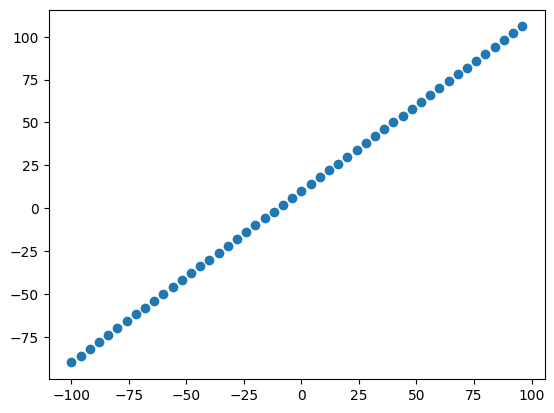

In [19]:
#Visualize data
plt.scatter(X,y)

In [20]:
#Split data into training and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

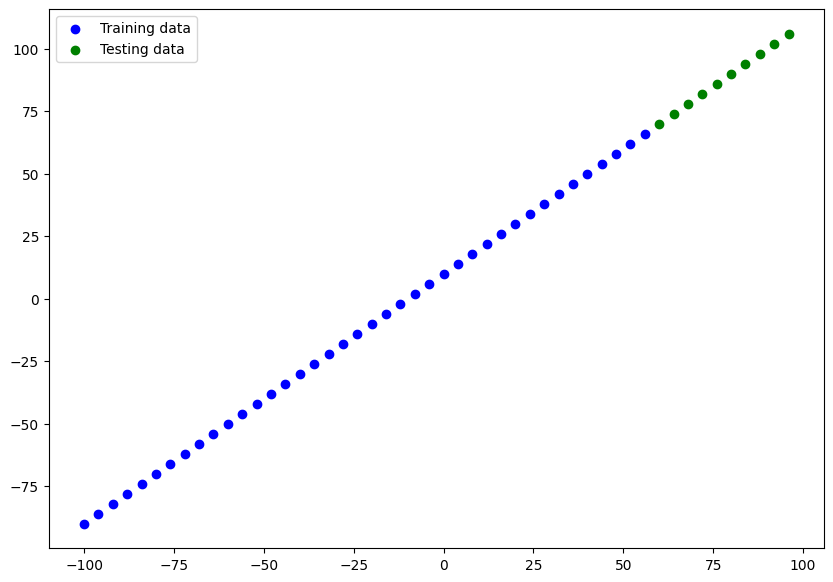

In [21]:
#Visualize data
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [22]:
#Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# #Fit model
# model.fit(X_train, y_train, epochs=100)

In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
#SEt random seed
tf.random.set_seed(42)

#Create model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1],name="hidden_layer_1"),
    tf.keras.layers.Dense(100, name="hidden_layer_2"),
    tf.keras.layers.Dense(100, name="hidden_layer_3"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

#Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#Summary
model.summary()

/home/hub/miniconda3/envs/tf-cpu/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,501 (80.08 KB)

 Trainable params: 20,501 (80.08 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#Fit model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [26]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,505 (240.26 KB)

 Trainable params: 20,501 (80.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,004 (160.18 KB)

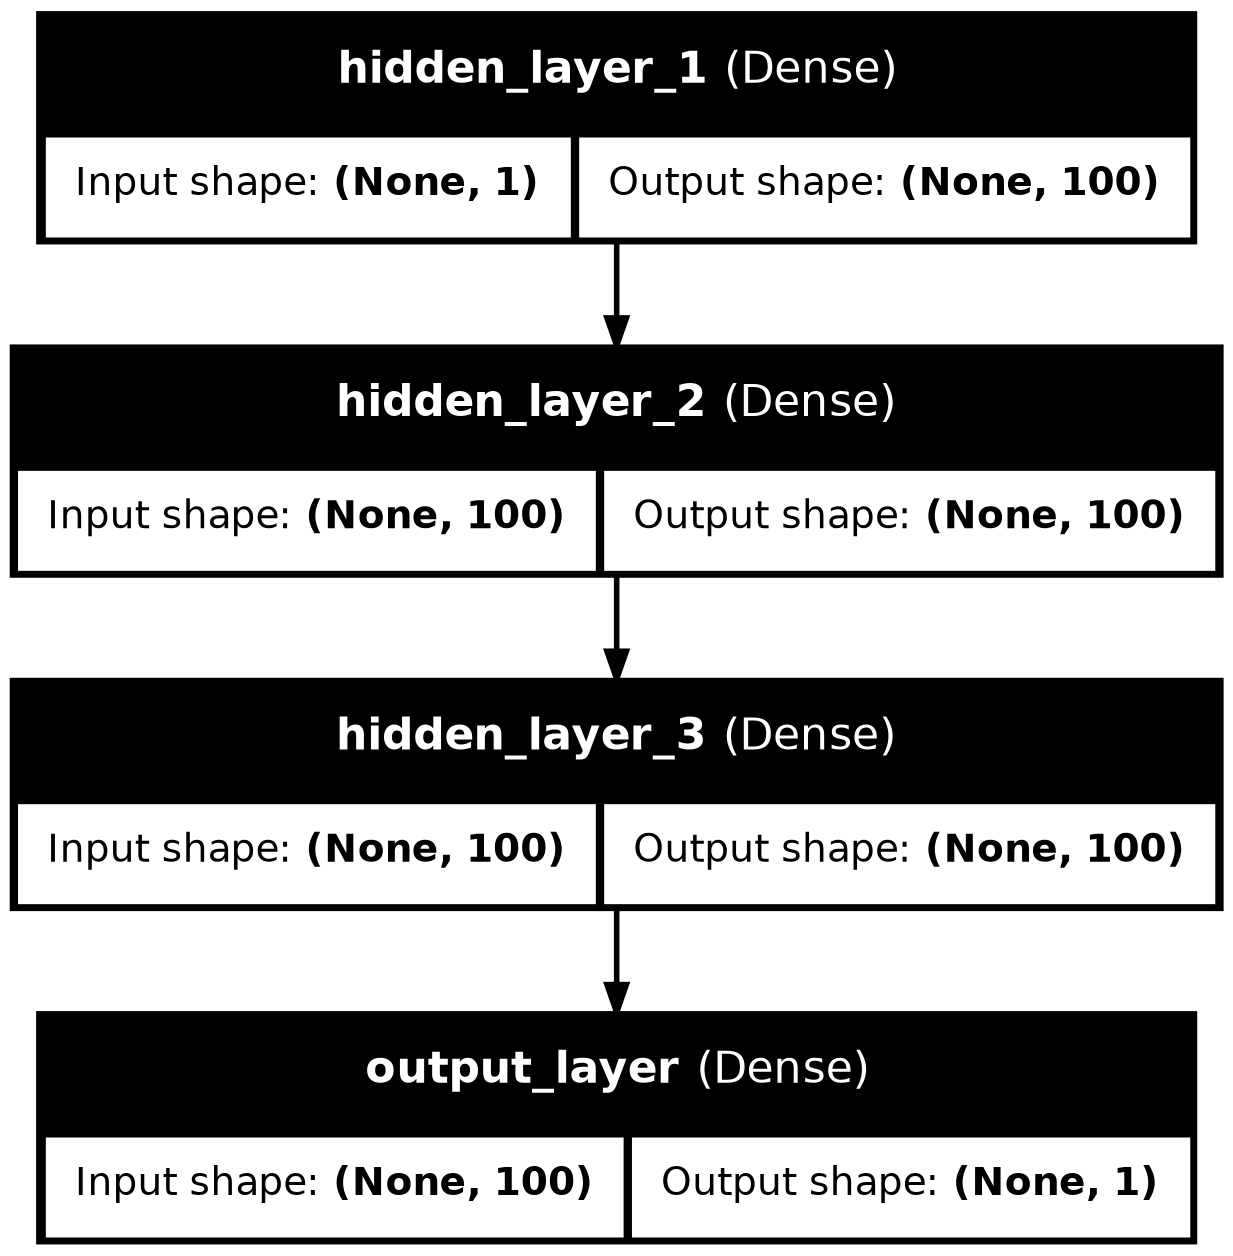

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_layer_names=True, show_shapes=True)


In [28]:
#Make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[63.76509 ],
       [67.37708 ],
       [70.989105],
       [74.60112 ],
       [78.21313 ],
       [81.825134],
       [85.43716 ],
       [89.049164],
       [92.661194],
       [96.2732  ]], dtype=float32)

In [29]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [30]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    # Show the legend
    plt.legend()

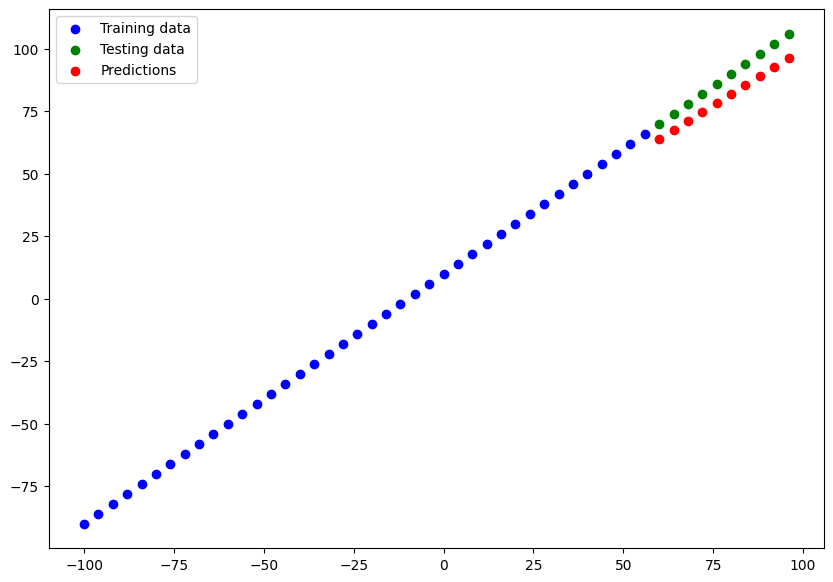

In [31]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [32]:
#Evaluate model
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 7.9809 - mae: 7.9809


[7.980862617492676, 7.980862617492676]

In [35]:
mae = tf.metrics.mae(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([6.234909, 6.622917, 7.010895, 7.39888 , 7.786873, 8.174866,
       8.562843, 8.950836, 9.338806, 9.726799], dtype=float32)>

In [37]:
y_test, y_preds

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[63.76509 ],
        [67.37708 ],
        [70.989105],
        [74.60112 ],
        [78.21313 ],
        [81.825134],
        [85.43716 ],
        [89.049164],
        [92.661194],
        [96.2732  ]], dtype=float32))

In [46]:
y_test.shape, y_preds.shape

(TensorShape([10]), (10, 1))

In [53]:
y_preds.squeeze().shape

(10,)

In [56]:
mse = tf.metrics.mse(y_true=y_test,
                    y_pred=y_preds.squeeze())
mae = tf.metrics.mae(y_true=y_test,
                    y_pred=y_preds.squeeze())
mae,mse

(<tf.Tensor: shape=(), dtype=float32, numpy=7.980862617492676>,
 <tf.Tensor: shape=(), dtype=float32, numpy=64.93607330322266>)

In [80]:
def mae(y_test, y_preds):
    return tf.metrics.mae(y_true = y_test,
                          y_pred = y_preds.squeeze())
def mse(y_test, y_preds):
    return tf.metrics.mse(y_true = y_test,
                          y_pred = y_preds.squeeze())

RUNNING EXPERIMENTS TO IMPROVE MODEL

In [110]:
#Model 1

#set random seed
tf.random.set_seed(42)

#Replicate model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])    

#Fit model
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


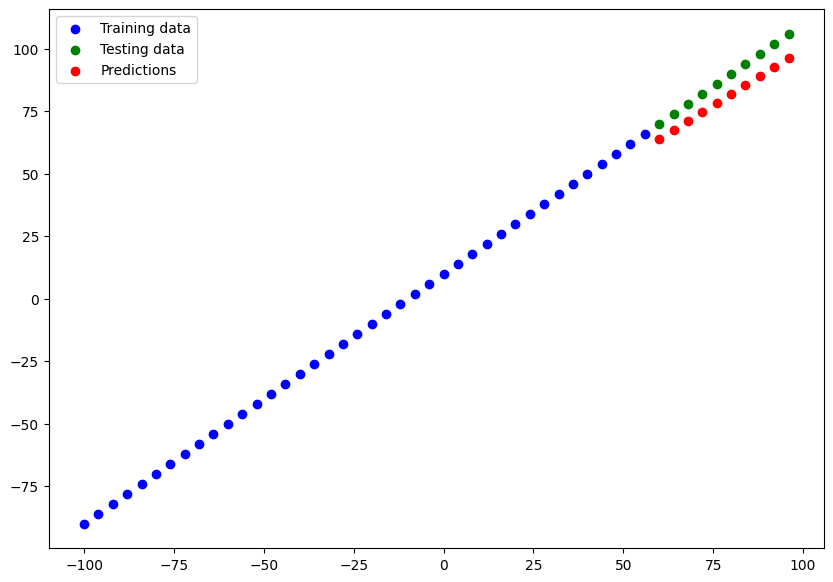

In [111]:
#prediction for model1
preds_1 = model.predict(X_test)
plot_predictions(predictions=preds_1)

In [112]:
#Calculate model metrics
mae_1 = mae(y_test, preds_1.squeeze()).numpy()
mse_1 = mse(y_test, preds_1.squeeze()).numpy()
mae_1, mse_1

(np.float32(7.9808626), np.float32(64.93607))

In [113]:
#Build model 2

#set random seed
tf.random.set_seed(42)

#Replicate model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])  

#compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#fit model
model_2.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


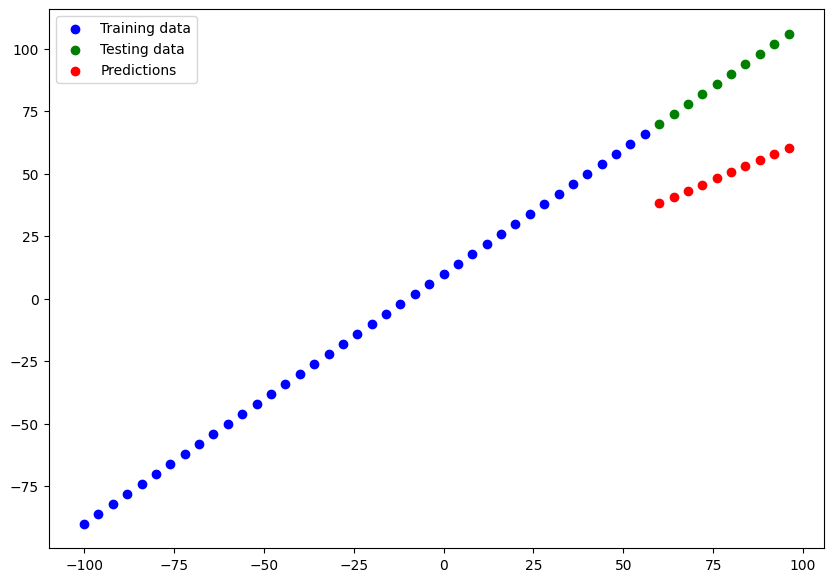

In [114]:
preds_2 = model_2.predict(X_test)
plot_predictions(predictions=preds_2)

In [115]:
mse_2=mse(y_test, preds_2).numpy()
mae_2=mae(y_test, preds_2).numpy()
mse_2, mae_2

(np.float32(1514.2561), np.float32(38.657204))

In [117]:
#Build model 3

#set random seed
tf.random.set_seed(42)

#Replicate model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#fit model
model_3.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


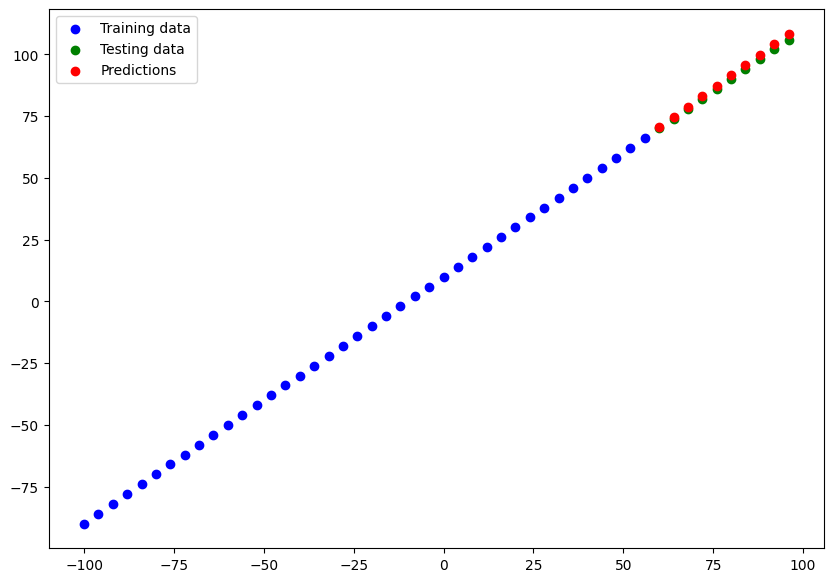

In [118]:
preds_3 = model_3.predict(X_test)
plot_predictions(predictions=preds_3)

In [119]:
mae_3 = mae(y_test, preds_3).numpy()
mse_3 = mse(y_test, preds_3).numpy()
mae_3, mse_3

(np.float32(1.390364), np.float32(2.299375))

Comparing results

In [120]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]
import pandas as pd 
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,7.980863,64.936073
1,model_2,38.657204,1514.256104
2,model_3,1.390364,2.299375


In [121]:
model_3.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

SAVE MODEL

In [132]:
#Save the best performing model
model_3.save('saved_model/best_model.keras')

Loading model

In [133]:
#Load a model from file
loaded_saved_model = tf.keras.models.load_model("best_model.h5")
loaded_saved_model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [134]:
#compare model 3 predictions with saved model predictions
preds_3 = model_3.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds).numpy() == mae(y_test, preds_3).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


np.True_

Larger Example

In [136]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [138]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [142]:
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [144]:
#Create X,y
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head(),y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) #reporoducibility
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [146]:
#set random seed
tf.random.set_seed(42)

#Create model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])    

#fit model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10596.2646 - mae: 10596.2646   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7690.2026 - mae: 7690.2026 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7429.3589 - mae: 7429.3589 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7447.5332 - mae: 7447.5332 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7856.2622 - mae: 7856.2622 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7369.6777 - mae: 7369.6777 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7387.5757 - mae: 7387.5757 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7665.5020 - mae: 7665.5020 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7449.5151 - mae: 7449.5151 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7323.2520 - mae: 7323.2520 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7208.1494 - mae: 7208.1494 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━

In [148]:
#chceck the results
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6289.4424 - mae: 6289.4424 


[6074.1796875, 6074.1796875]

Lets try a bigger model

In [ ]:
#set random seed
tf.random.set_seed(42)

#adding additional callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#Create model with extra layer
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) #1 output neuron
])

#Compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

#fit model
history = insurance_model_2.fit(X_train, y_train, epochs=100, callbacks=[callback], verbose=0)
# history_2 = insurance_model_2.fit(X_train, y_train, epochs=200, callbacks=[callback], verbose=0)


In [163]:
#evaluate model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3214.9851 - mae: 3214.9851 


[3171.94091796875, 3171.94091796875]

Text(0.5, 0, 'epochs')

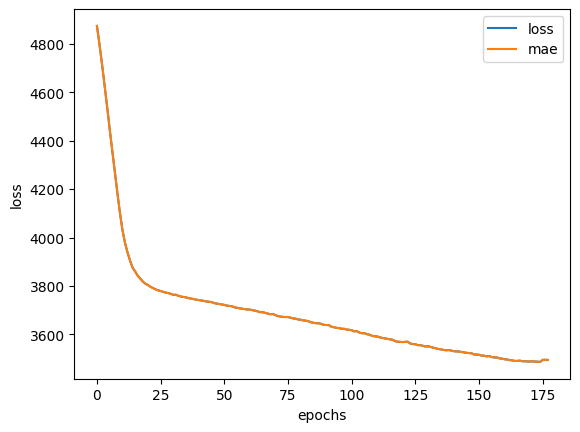

In [ ]:
#Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")